In [85]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  # seaborn is based on matplotlib
sns.set(color_codes= True)  # adds a nice background to the graphs
%matplotlib inline

import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

# Question 3

In [43]:

null_values = ["Nan",np.nan,"-","na","Nan"]
df = pd.read_csv("CompanyX_EU.csv",na_values=null_values)  #• Read the CSV file.

In [44]:
df.dtypes #• Check the datatypes of each attribute.

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [45]:
df.isnull().sum()  #• Check for null values in the attributes.

Startup             0
Product             6
Funding           214
Event              13
Result              0
OperatingState      0
dtype: int64

In [46]:
df1 = df.dropna() #• Drop the null values.

In [47]:
df1

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
656,Zenefits,zenefits.com,$583.6M,Disrupt NYC 2013,Finalist,Operating
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [48]:
df1['Funding'] = df1['Funding'].str.replace('$','') #• Convert the ‘Funding’ features to a numerical value.

/home/akshat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df1['Funding'] = df1['Funding'].replace({'K':'*0.001','M':'','B':'*0.01'},regex=True).map(pd.eval).astype(float)

/home/akshat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df1

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,0.63,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,1.00,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,19.30,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,29.00,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,1.80,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
656,Zenefits,zenefits.com,583.60,Disrupt NYC 2013,Finalist,Operating
657,Zivity,zivity.com,8.00,TC40 2007,Contestant,Operating
659,Zocdoc,zocdoc.com,223.00,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,3.40,Disrupt SF 2013,Audience choice,Operating


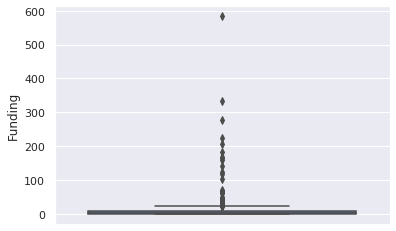

In [66]:
sns.boxplot(df1["Funding"], orient="v") #• Plot box plot for funds in million.

In [67]:
df1['Funding'].describe()           
q1 = 0.73
q3 = 9.55
iqr = q3-q1



In [68]:
lower_fence = q1-1.5*iqr          #• Get the lower fence from the box plot.
lower_fence

-12.5

In [69]:
upper_fence = q3+1.5*iqr        #• Gettign Upper Fence upper fence.
upper_fence

22.78

In [78]:
print("The number of out liers above the upper fence are ", len(df1[df1['Funding'] > upper_fence]))   #• Check number of outliers greater than upper fence.

The number of out liers above the upper fence are  59


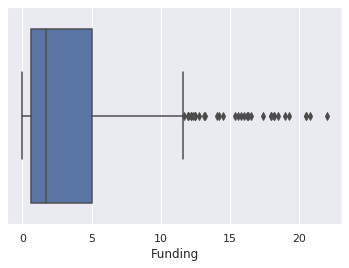

In [79]:
new_data = df1[df1['Funding'] < upper_fence]
sns.boxplot(new_data['Funding']);

In [80]:
new_data.reset_index(drop=True,inplace=True)
new_data.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,3DLT,3dlt.com,0.63,Disrupt NYC 2013,Contestant,Closed
1,3Dprintler,3dprintler.com,1.00,Disrupt NY 2016,Audience choice,Operating
2,5to1,5to1.com,19.30,TC50 2009,Contestant,Acquired
3,AdhereTech,adheretech.com,1.80,Hardware Battlefield 2014,Contestant,Operating
4,AdRocket,adrocket.com,1.00,TC50 2008,Contestant,Closed


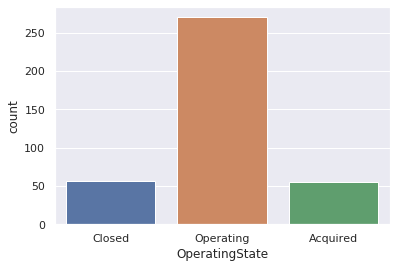

In [81]:
# Frequency of OperatingState Feature Classes
sns.countplot(new_data['OperatingState']);

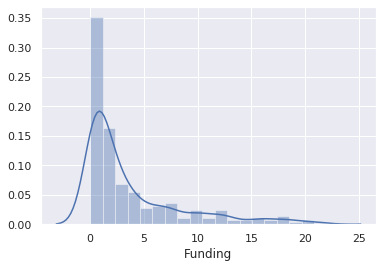

In [82]:
# Distribution Plot for Funds in Million
sns.distplot(new_data['Funding']);
plt.grid(True)
plt.show()

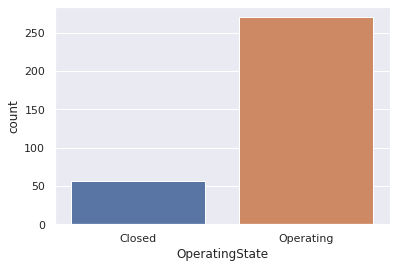

In [83]:
# Distribution plot for the companies that are operating and closed
criteria_1 = new_data['OperatingState']=='Operating'
criteria_2 = new_data['OperatingState']=='Closed'
criteria_all = criteria_1 | criteria_2
sns.countplot(x='OperatingState',data=new_data[criteria_all]);

In [86]:
# Answer: 1
operating_companies = new_data['OperatingState'] == 'Operating'
acquired_companies = new_data['OperatingState'] == 'Acquired'

closed_companies = new_data['OperatingState'] == 'Closed'

total_operating_companies = operating_companies | acquired_companies

# Create the group for total operating companies
group1 = new_data[total_operating_companies]['Funding'].values

# Create the group for total closed companies
group2 = new_data[closed_companies]['Funding'].values

# Calculate the t-statistic val and p-val for both the companies data and check
# whether there's any significant difference or not!
t_statistic, p_val = ttest_ind(group1,group2)
print("t-Statistic:",t_statistic, "\np-value:",p_val,"\n")

if p_val < 0.05:
    print(f"With a p-value of {round(p_val, 4)} the difference is significant. aka | We Reject the Null Hypothesis |")
else:
    print(f"With a p-value of {round(p_val, 4)} the difference is not significant. aka | We Fail to reject the null Hypothesis |")

t-Statistic: 1.8267152125847408 
p-value: 0.06852899949372873 

With a p-value of 0.0685 the difference is not significant. aka | We Fail to reject the null Hypothesis |


In [89]:
copy_dataset = new_data.copy()
copy_dataset

,Startup,Product,Funding,Event,Result,OperatingState
0,3DLT,3dlt.com,0.630,Disrupt NYC 2013,Contestant,Closed
1,3Dprintler,3dprintler.com,1.000,Disrupt NY 2016,Audience choice,Operating
2,5to1,5to1.com,19.300,TC50 2009,Contestant,Acquired
3,AdhereTech,adheretech.com,1.800,Hardware Battlefield 2014,Contestant,Operating
4,AdRocket,adrocket.com,1.000,TC50 2008,Contestant,Closed
...,...,...,...,...,...,...
376,Xendo,xendo.com,0.028,Disrupt SF 2014,Contestant,Acquired
377,Yap,yapme.com,10.000,TC40 2007,Contestant,Closed
378,YayPay Inc,yaypay.com,0.900,Disrupt London 2015,Contestant,Operating
379,Zivity,zivity.com,8.000,TC40 2007,Contestant,Operating


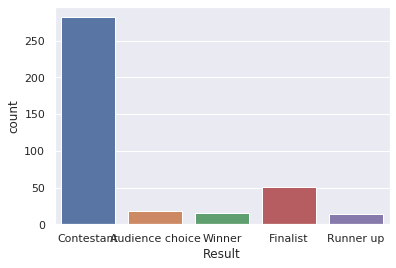

In [90]:
# Answer: 3 (Frequency Distribution for Result Plot)
sns.countplot(copy_dataset['Result']);

In [91]:
# Answer 4: Percentage of winners that are still operating and percentage of contestants that are still operating
operating_df = copy_dataset[total_operating_companies]

winners_df = operating_df[operating_df['Result']=='Winner']
operating_constestant_df = operating_df[operating_df['Result']=='Contestant']

n_winners = winners_df['Result'].value_counts()[0]
n_contestants = operating_constestant_df['Result'].value_counts()[0]

#print(f"Total Winners: {n_winners}")
#print(f"Total Contestants: {n_contestants}")

n_operating_companies = operating_df['OperatingState'].value_counts()[0]
#print(f"Total Operating Companies: {n_operating_companies}")

print(f"Percentage of winners that are still operating:",round(n_winners/n_operating_companies,2)*100)
print(f"Percentage of contestants that are still operating: {round(n_contestants/n_operating_companies,2)*100}%")

Percentage of winners that are still operating: 6.0
Percentage of contestants that are still operating: 86.0%


In [92]:
# Answer 5: Write your hypothesis comparing the proportion of companies that are operating 
# between winners and contestants.

# 1. Null Hypothesis: The proportion of companies that are operating between winners and contestants are equal
# 2. Alternate Hypothesis: The proportion of companies that are operating between winners and contestants are not equal

from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([n_winners, n_contestants],[n_operating_companies, n_operating_companies])

if pval < 0.05:
    print(f'With a p-value of {pval} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {pval} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 2.657970611838681e-78 the difference is significant. aka |We reject the null|


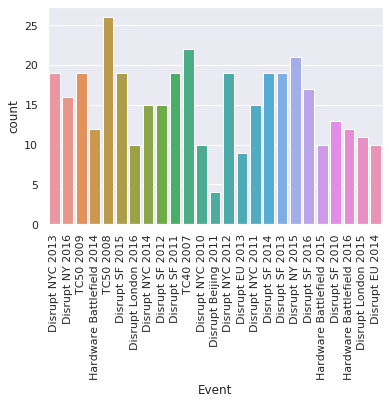

In [93]:
p = sns.countplot(data=copy_dataset.loc[copy_dataset['Event']!="-"], x='Event');
plt.setp(p.get_xticklabels(), rotation=90);

In [94]:
# Select only the Event that has disrupt keyword from 2013 onwards.
import re
disrupt_events = copy_dataset.Event.str.contains("disrupt",case=False);
events_data = copy_dataset[disrupt_events]
events_data.reset_index(drop=True, inplace=True)
years_list = []
for i in range(len(events_data['Event'].tolist())):
    match = re.search('\d{4}', events_data['Event'][i])
    years_list.append(match.group(0))
events_data['Event Year'] = pd.Series(list(map(int, years_list)))

/home/akshat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [95]:
# Answer 7:
filtered_events = events_data[events_data['Event Year'] > 2013]
filtered_events.reset_index(drop=True,inplace=True)
filtered_events

,Startup,Product,Funding,Event,Result,OperatingState,Event Year
0,3Dprintler,3dprintler.com,1.000,Disrupt NY 2016,Audience choice,Operating,2016
1,Agrilyst,agrilyst.com,1.000,Disrupt SF 2015,Winner,Operating,2015
2,Aiden,aiden.ai,0.750,Disrupt London 2016,Contestant,Operating,2016
3,Aircall,aircall.io,11.600,Disrupt SF 2015,Contestant,Operating,2015
4,AirHelp,airhelp.com,12.200,Disrupt NYC 2014,Contestant,Operating,2014
...,...,...,...,...,...,...,...
133,Wellth,wellthapp.com,2.500,Disrupt NY 2015,Contestant,Operating,2015
134,Wellthy,wellthy.com,2.000,Disrupt SF 2015,Contestant,Operating,2015
135,Welltwigs,welltwigs.com,0.050,Disrupt NY 2015,Contestant,Operating,2015
136,Xendo,xendo.com,0.028,Disrupt SF 2014,Contestant,Acquired,2014
